In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# import dataset

df = pd.read_csv("haberman.csv",header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
df.head(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# no of data point and future.
df.shape

(306, 4)

In [4]:
# no of classes
df.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [5]:
df.survival_status_after_5_years.value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year_of_treatment              306 non-null    int64
 2   positive_lymph_nodes           306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Obeservation

- There are not any missing values.
- Dataset is an imbalanced because of there are 225 out of 306 paitents are survived after 5 year while only 81 paitents are survived within 5 year out of 306.
- target column has a integer value.
- The values of 'survival_status_after_5_years' column are not   meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)

#  High Level Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year_of_treatment,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
positive_lymph_nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
survival_status_after_5_years,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [8]:
df['age'].max()

83

In [8]:
print(f"no of row: {df.shape[0]}\n")
print (f"no of future:{df.shape[1]}\n")
print("Columns:\t" + ", ".join(df.columns),"\n")
print("Target variable distribution \n")
print(df.iloc[:,-1].value_counts(),'\n')
print("*"*50)
print(df.iloc[:,-1].value_counts(normalize = True))


no of row: 306

no of future:4

Columns:	age, year_of_treatment, positive_lymph_nodes, survival_status_after_5_years 

Target variable distribution 

1    225
2     81
Name: survival_status_after_5_years, dtype: int64 

**************************************************
1    0.735294
2    0.264706
Name: survival_status_after_5_years, dtype: float64


##### Observation 

- The age of the paitent very from 30 to 83 and avrage age of the paitent is 52 year.
- There are 75% of the paitent has positive_iymph_nodes less than 5,while 25% of the paitent do not have any positive_iymph_nodes.
- the dataset contain small data.
- The target column is imbalance with 73% Yes.

#### Explain our objective.

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes.

### Univariate Analysis

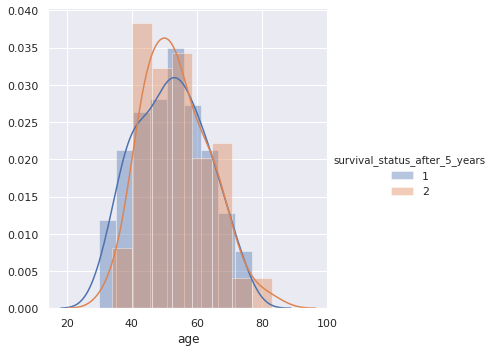

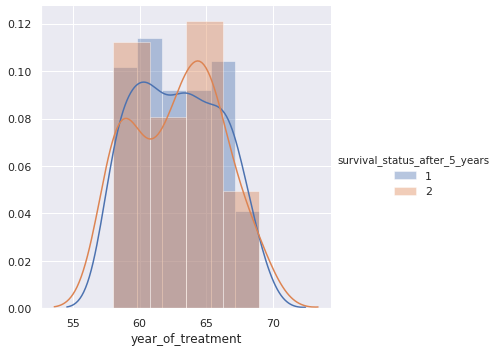

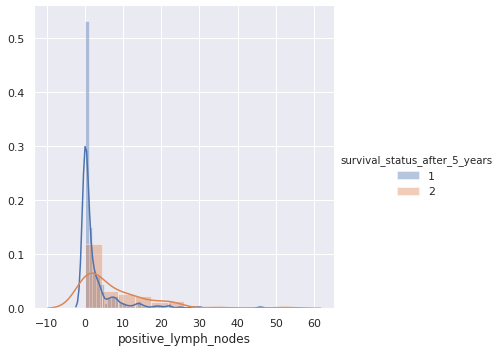

In [9]:
# Distribution plot

for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status_after_5_years', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

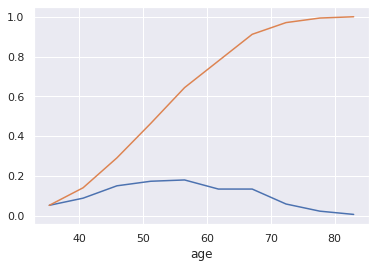

In [10]:
#cdf 

counts,bin_edges = np.histogram(df['age'],bins=10,density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
plt.xlabel('age')
plt.show()

############feature###########
bins_edges:
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF:
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF:
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
############feature###########
bins_edges:
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF:
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF:
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
############feature###########
bins_edges:
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF:
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF:
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.  

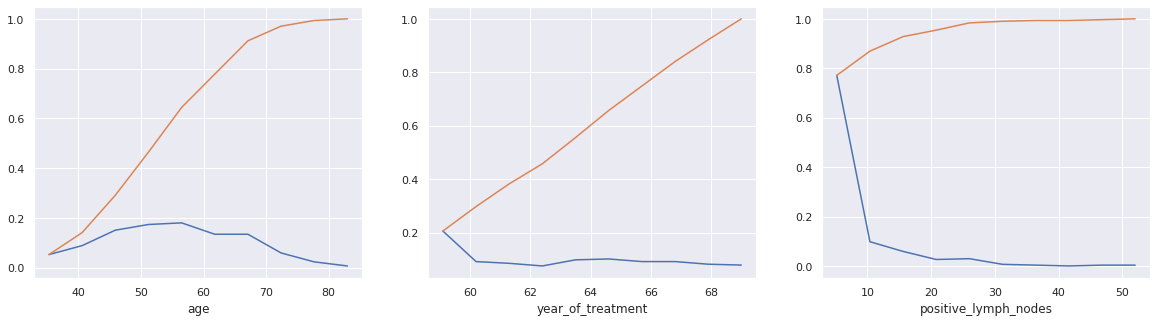

In [11]:
# cdf of all features. 
plt.figure(figsize=(20,5))
for inx,feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1,3,inx+1)
    print('############feature###########')
    counts,bins_edges = np.histogram(df[feature],bins=10,density=True)
    print(f"bins_edges:\n{bins_edges}")
    pdf = counts/(sum(counts))
    print(f"PDF:\n{pdf}")
    cdf = np.cumsum(pdf)
    print(f"CDF:\n{cdf}")
    plt.plot(bins_edges[1:],pdf,bins_edges[1:],cdf)
    plt.xlabel(feature)
    

There are aproximetly 80% of paitent has positive_lymph_nodes below 5.

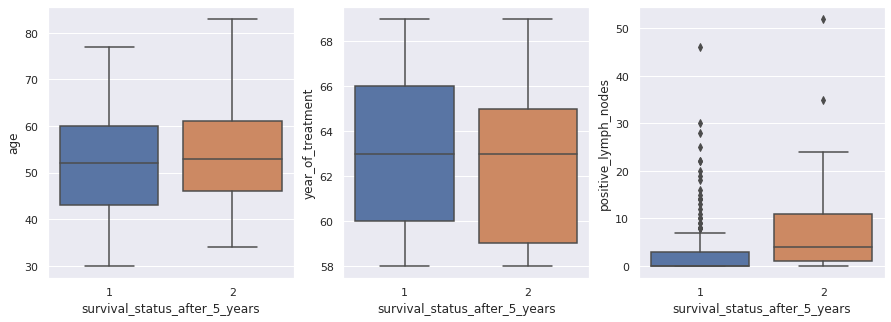

In [12]:
# boxplot.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for inx,feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot(x='survival_status_after_5_years',y=feature,data=df,ax=axes[inx])

- There is every paitent below 34 age all alive after 5 year.
- The paitents treated after 1966 has slight higher chance to survive.
- The paitents who treated before 1956 has lower chance to survived.
- year of the treatment and positive_lymp_nodes both are more usefull for classification and slight lower usefull age datapoint.

In [64]:
df[(df['year_of_treatment']>66) & (df['survival_status_after_5_years']==1)].count()

age                              38
year_of_treatment                38
positive_lymph_nodes             38
survival_status_after_5_years    38
dtype: int64

In [13]:
df[df['positive_lymph_nodes']==10]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
5,33,58,10,1
11,34,61,10,1
115,49,64,10,2


In [14]:
df['year_of_treatment'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year_of_treatment, dtype: int64

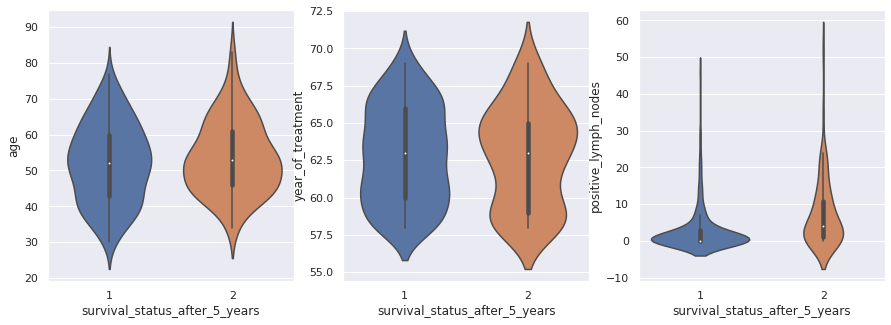

In [15]:
# violin plot.
fig, axis= plt.subplots(1,3,figsize=(15,5))
for inx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot(x='survival_status_after_5_years',y=feature,data=df,ax=axis[inx])

In [65]:
df[(df['year_of_treatment']==65) & (df['survival_status_after_5_years']==2)]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
80,45,65,6,2
92,46,65,20,2
98,47,65,0,2
157,53,65,1,2
161,53,65,12,2
168,54,65,23,2
169,54,65,5,2
190,56,65,9,2
224,60,65,0,2
230,61,65,0,2


In [71]:
df[(df['year_of_treatment']<66) & (df['survival_status_after_5_years']==2)]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
7,34,59,0,2
43,41,60,23,2
44,41,64,0,2
54,42,59,0,2
62,43,58,52,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


In [73]:
df[(df["year_of_treatment"]<59) & (df['survival_status_after_5_years']==2)].count()

age                              12
year_of_treatment                12
positive_lymph_nodes             12
survival_status_after_5_years    12
dtype: int64

#### Bi-variate analysis

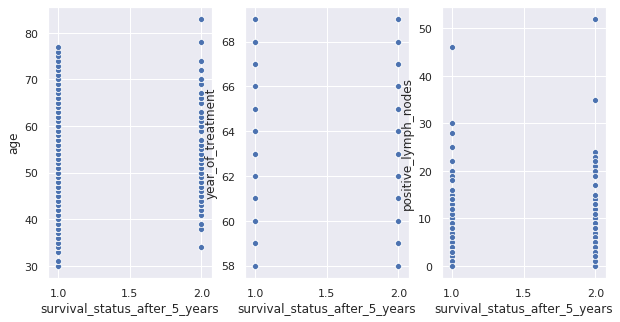

In [102]:
fig, axes = plt.subplots(1,3,figsize=(10,5))
for inx,feature in enumerate(list(df.columns)[:-1]):
    sns.scatterplot(x='survival_status_after_5_years',y=feature,data=df,ax=axes[inx],)

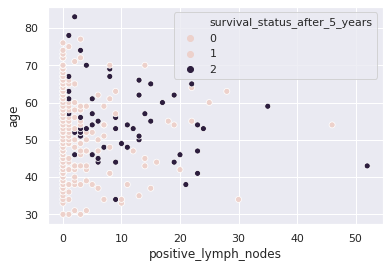

In [98]:
sns.scatterplot(data=df,x='positive_lymph_nodes',y='age',hue='survival_status_after_5_years')

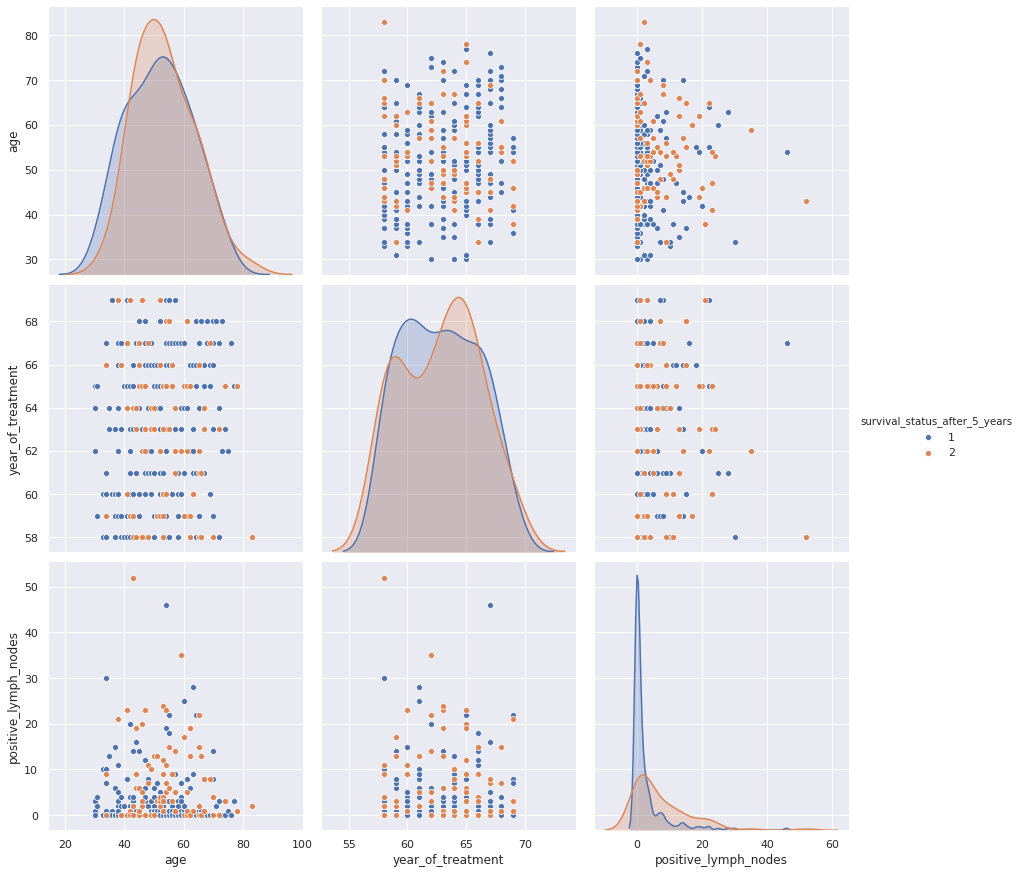

In [76]:
sns.pairplot(df,hue='survival_status_after_5_years',height=4
            )

- By scattering the data points between year_of_treatment and positive_lymph_nodes, we can see the better seperation between the two clases than other scatter plots.


In [91]:
df.iloc[:,-1].value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

In [83]:
df.tail(4)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [96]:
df.loc[1]

age                              30
year_of_treatment                62
positive_lymph_nodes              3
survival_status_after_5_years     1
Name: 1, dtype: int64

In [93]:
df.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [107]:
df[(df['positive_lymph_nodes']>=25) & (df['positive_lymph_nodes']<=30)]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
9,34,58,30,1
227,60,61,25,1
252,63,61,28,1


In [120]:
df[df['positive_lymph_nodes']==30]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
9,34,58,30,1


In [123]:
df[df.age==78]

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
304,78,65,1,2
